In [1]:
!pip install keras


You should consider upgrading via the '/Users/jyotisharma/code/deep_learning_projects/dlenv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

/Users/jyotisharma/code/deep_learning_projects/dlenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train) # value is between 0 to 255,  that shows this need scaling before the training

numpy.ndarray

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


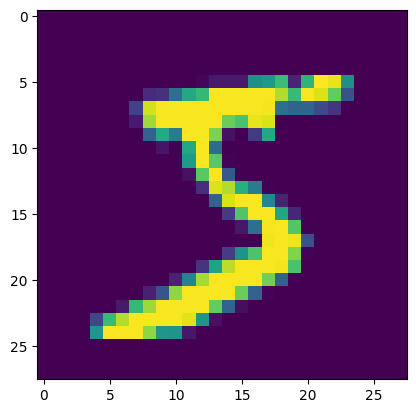

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) # 128 nodes - 1st hidden layer
model.add(Dense(10,activation='softmax')) # output layer, 10 nodes


/Users/jyotisharma/code/deep_learning_projects/dlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()  # 100480 trainable parameters = 784*128 + 128

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8607 - loss: 0.4836 - val_accuracy: 0.9553 - val_loss: 0.1557
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9606 - loss: 0.1360 - val_accuracy: 0.9660 - val_loss: 0.1130
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9744 - loss: 0.0896 - val_accuracy: 0.9697 - val_loss: 0.0982
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9818 - loss: 0.0645 - val_accuracy: 0.9728 - val_loss: 0.0909
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9865 - loss: 0.0474 - val_accuracy: 0.9738 - val_loss: 0.0865
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9757 - val_loss: 0.0852
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.9918 - loss: 0.0289 - val_accuracy: 0.9763 - val_loss: 0.0867
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.9935 -

In [13]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764

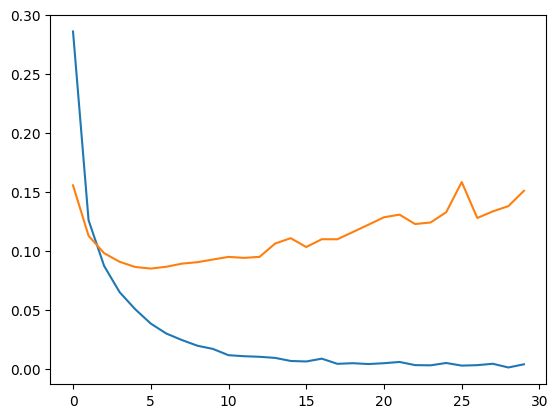

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

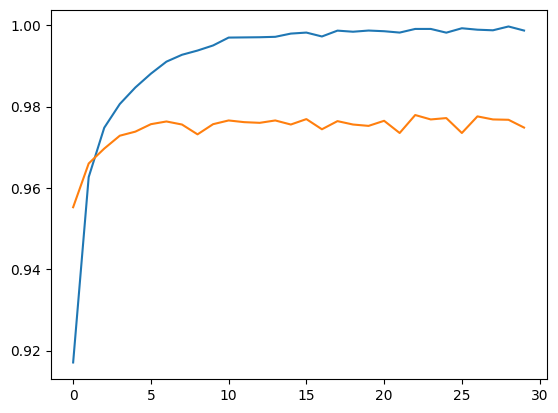

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

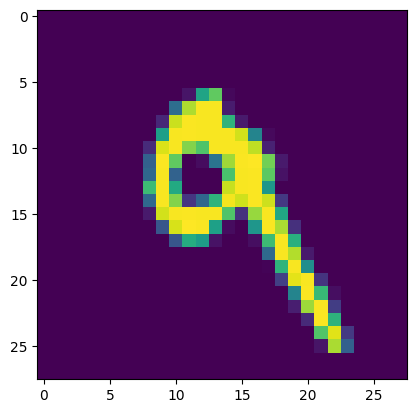

In [18]:
plt.imshow(X_test[7])

In [19]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1) # only for one image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([9])

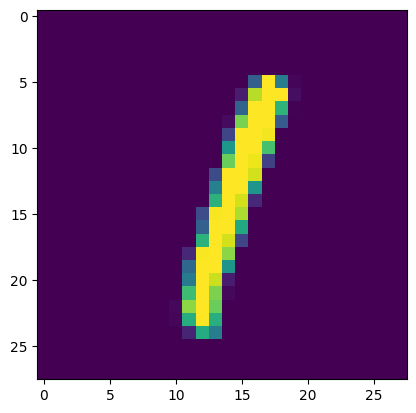

In [20]:
plt.imshow(X_test[5])

In [21]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1) # only for one image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([1])